# importing dataset

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [18]:
df=pd.read_csv('/home/sri/Downloads/diabetes.csv')
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


# Data preprocessing

In [19]:
df.shape

(768, 9)

In [20]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [21]:
variables = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction']
for i in variables:
    c = 0
    for x in (df[i]):
        if x == 0:
            c = c + 1
    print(i,c)

Glucose 5
BloodPressure 35
SkinThickness 227
Insulin 374
BMI 11
DiabetesPedigreeFunction 0


In [22]:
#replacing the missing values with the mean
variables = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
for i in variables:
    df[i].replace(0,df[i].mean(),inplace=True)

In [23]:
#checking to make sure that incorrect values are replace
for i in variables:
    c = 0
    for x in (df[i]):
        if x == 0:
            c = c + 1
    print(i,c)

Glucose 0
BloodPressure 0
SkinThickness 0
Insulin 0
BMI 0


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


# Data Analysis

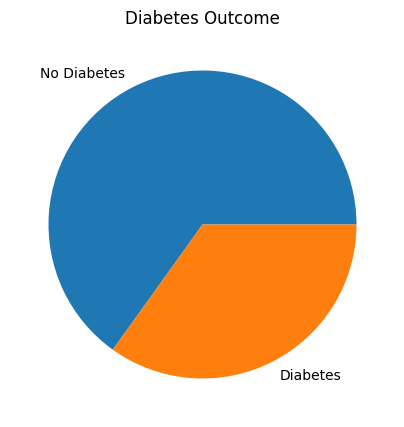

In [25]:
plt.figure(figsize=(5,5))
plt.pie(df['Outcome'].value_counts(), labels=['No Diabetes', 'Diabetes'])
plt.title('Diabetes Outcome')
plt.show()

/home/sri/jupy/jup_notebook/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 6.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


/home/sri/jupy/jup_notebook/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 22.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


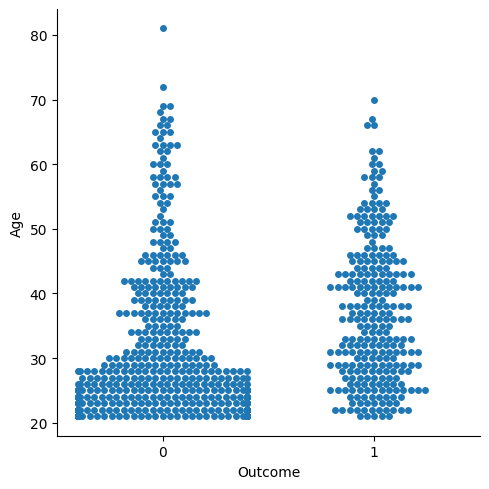

In [26]:
sns.catplot(x="Outcome", y="Age", kind="swarm", data=df)

<Axes: xlabel='Outcome', ylabel='Pregnancies'>

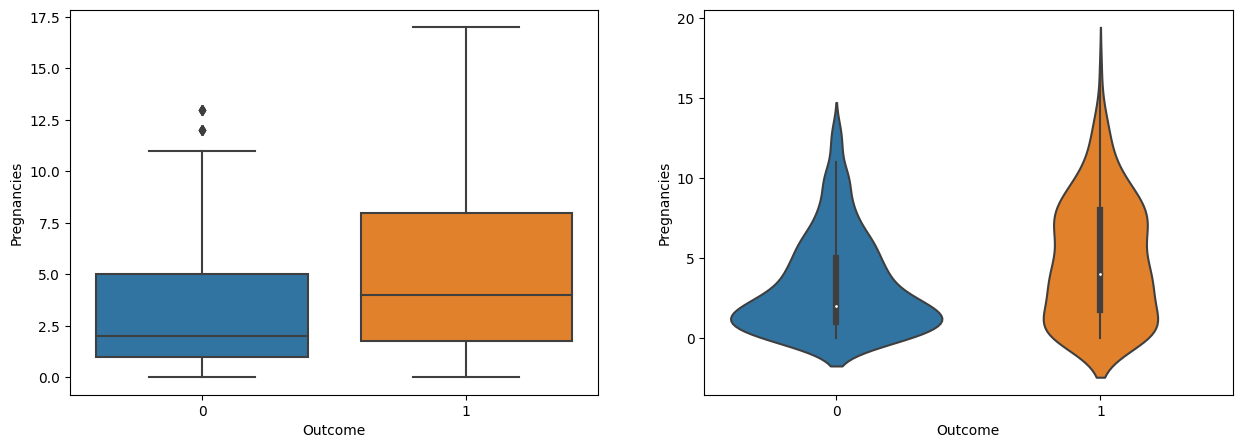

In [27]:
fig,ax = plt.subplots(1,2,figsize=(15,5))
sns.boxplot(x='Outcome',y='Pregnancies',data=df,ax=ax[0])
sns.violinplot(x='Outcome',y='Pregnancies',data=df,ax=ax[1])

Text(0.5, 1.0, 'Glucose vs Diabetes')

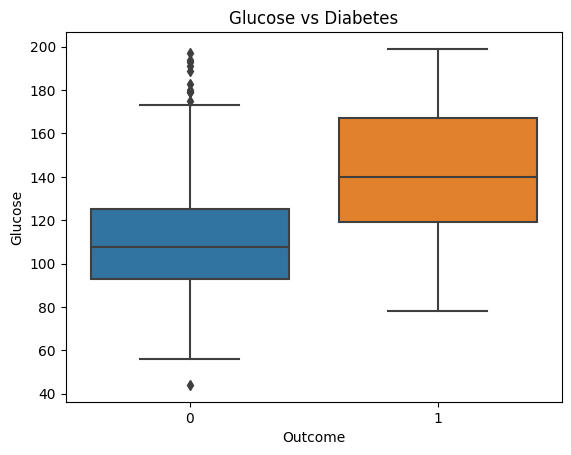

In [28]:
sns.boxplot(x='Outcome', y='Glucose', data=df).set_title('Glucose vs Diabetes')

Text(0.5, 1.0, 'Correlation Heatmap')

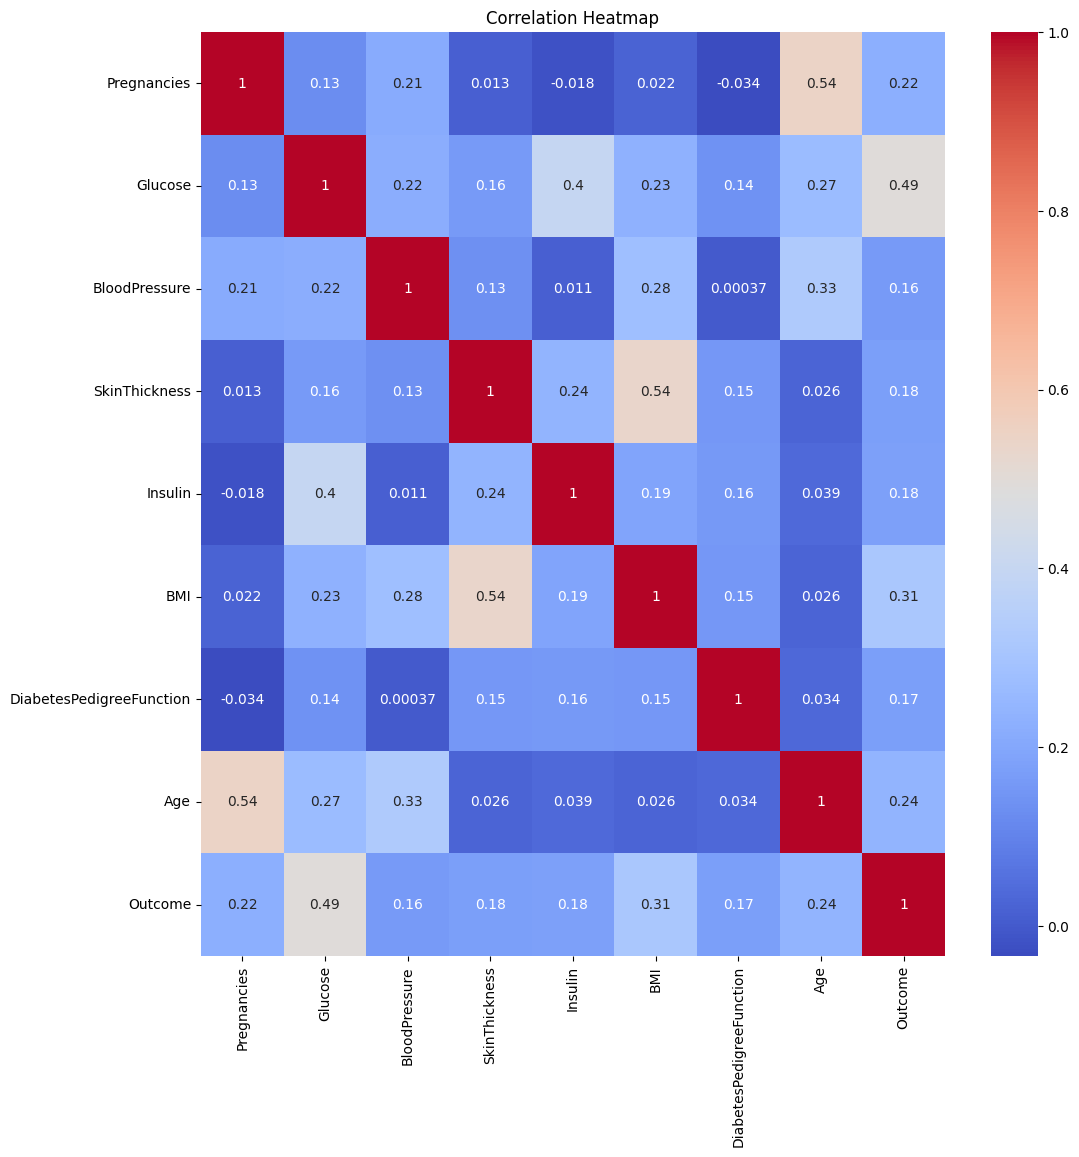

In [29]:
#correlation heatmap
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm').set_title('Correlation Heatmap')

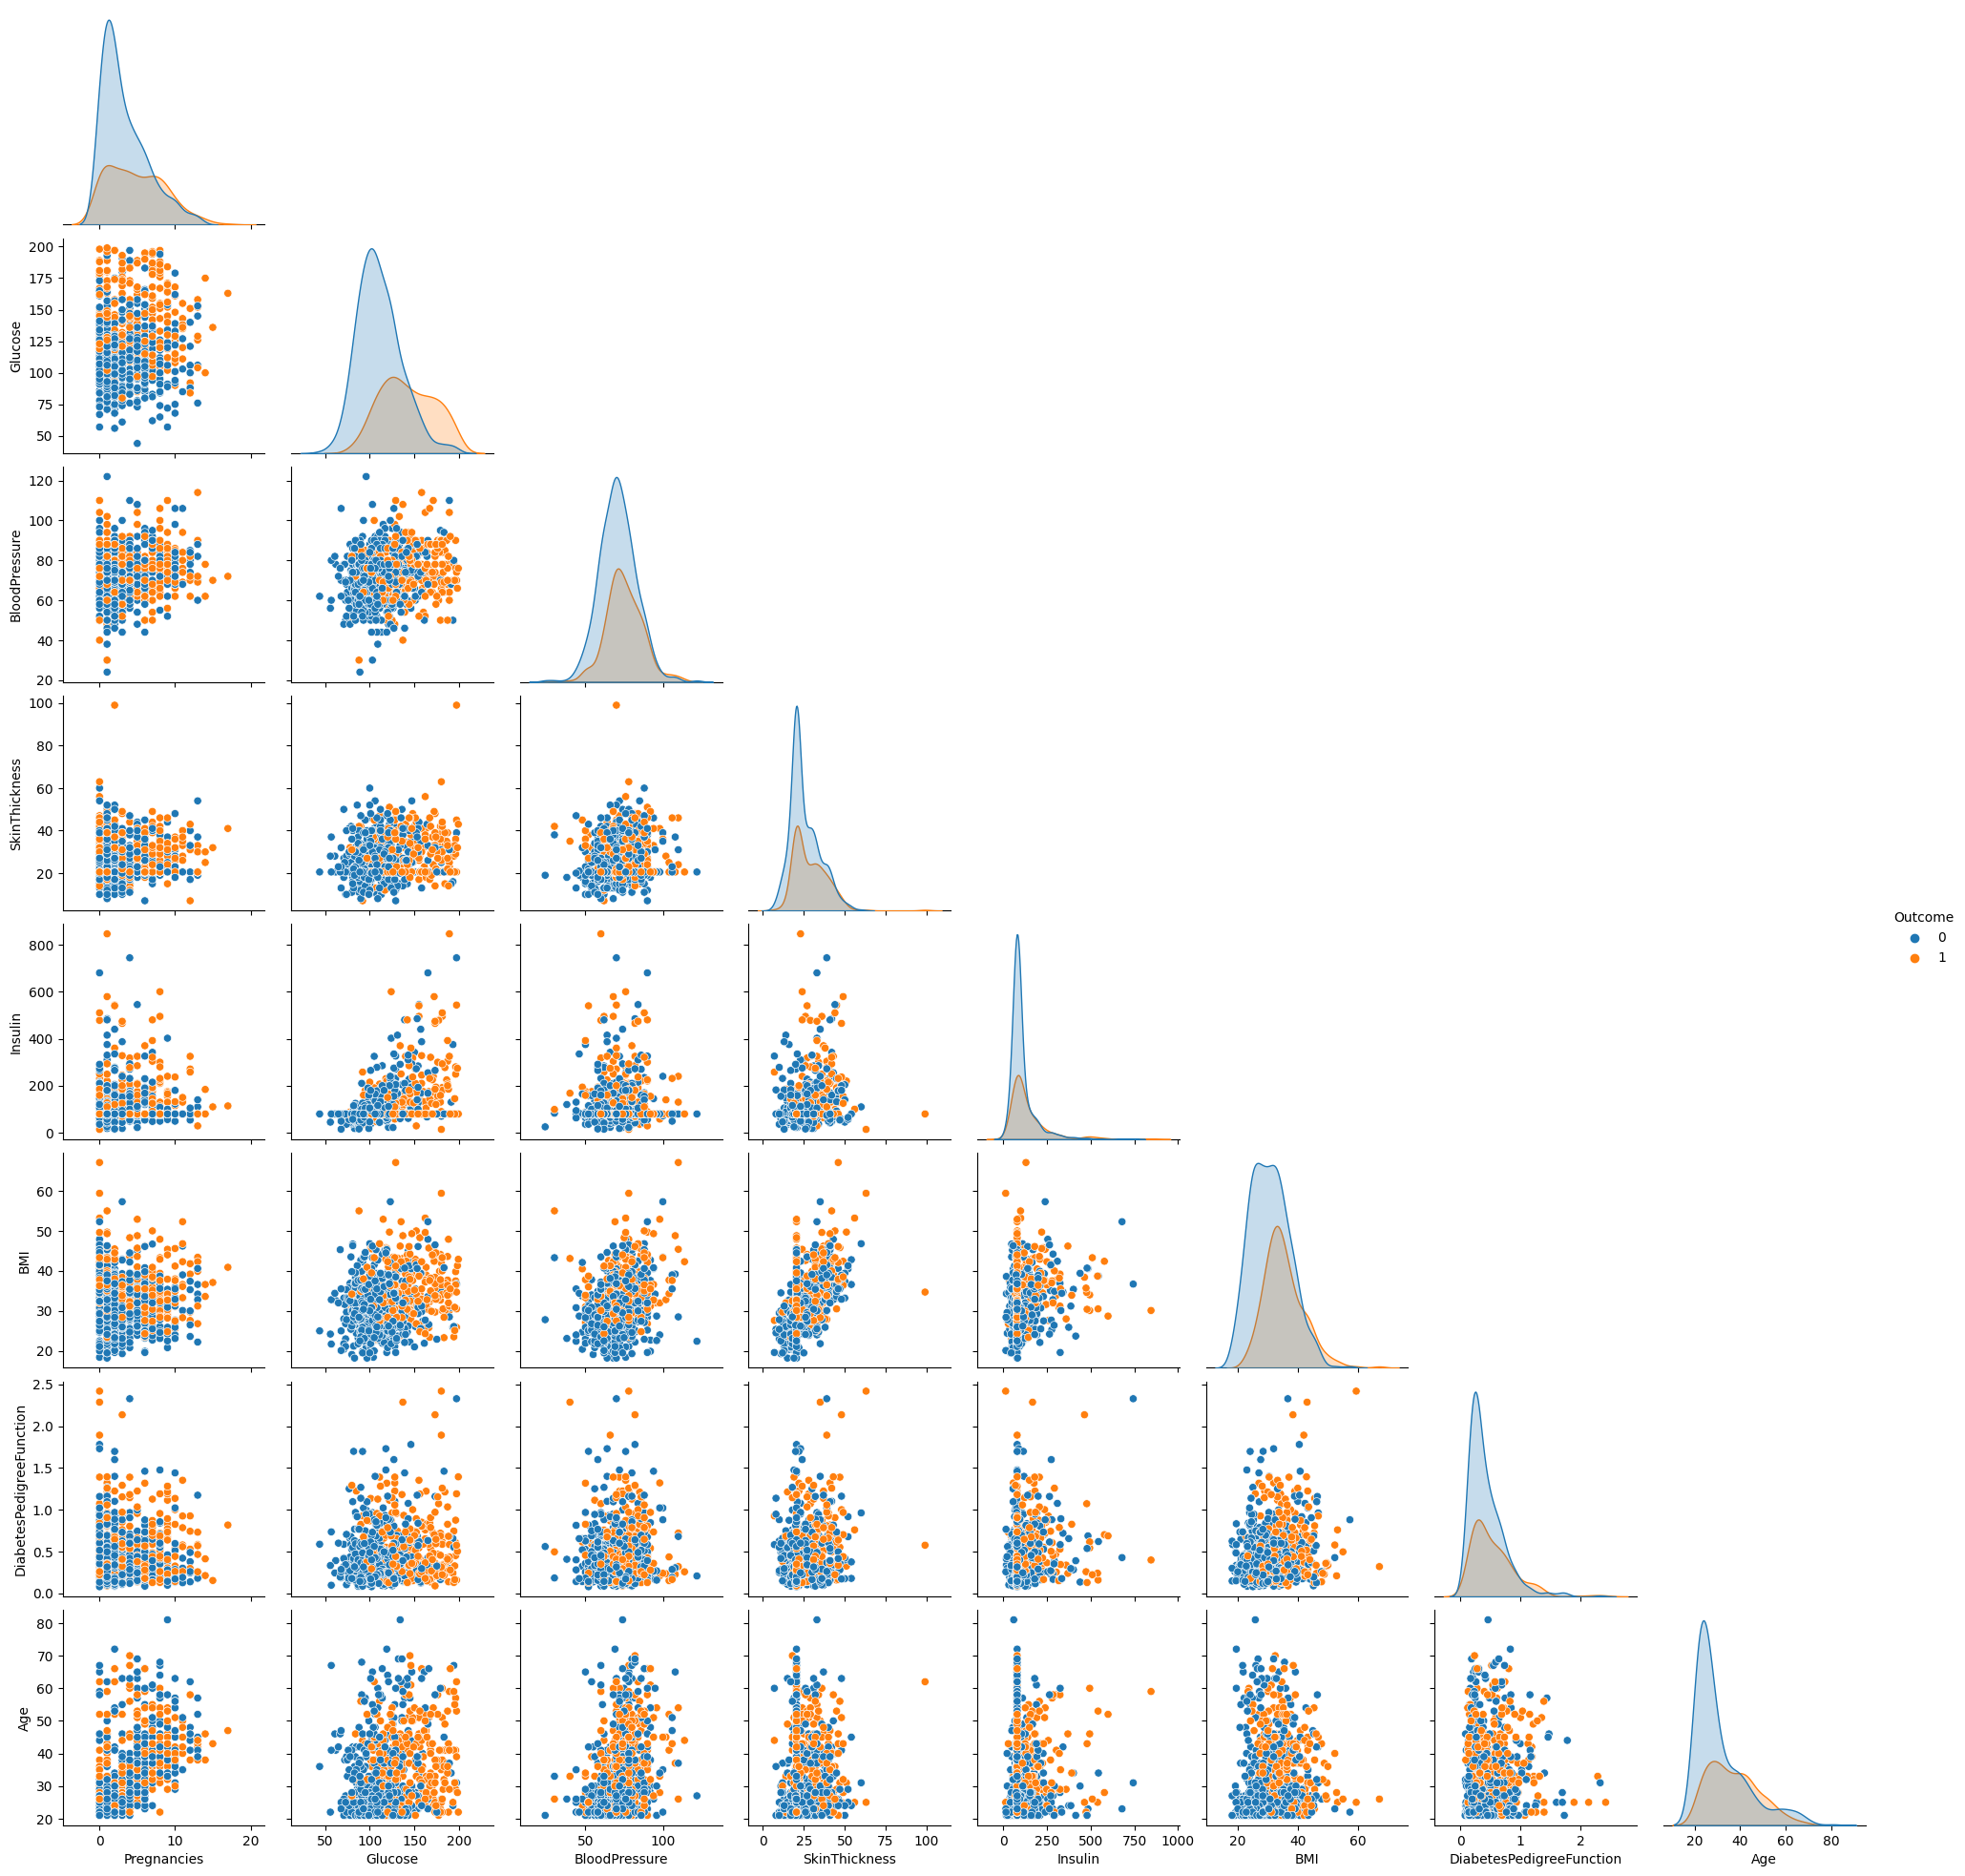

In [30]:
sns.pairplot(df, hue="Outcome", corner=True)

# Train Test split

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import pickle

x=df.drop(columns=['Outcome'])
y= df['Outcome']

x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.30)

In [38]:
model=LogisticRegression()
model.fit(x_train, y_train)
print("Logistic Regression Accuracy: ", model.score(x_test, y_test)*10)

Logistic Regression Accuracy:  7.8354978354978355


In [39]:
model.fit(x_train.values, y_train.values)

LogisticRegression()

In [40]:
print("Logistic Regression Accuracy: ", model.score(x_test, y_test)*100)

Logistic Regression Accuracy:  78.35497835497836


In [41]:
model=KNeighborsClassifier()
model.fit(x_train, y_train)
print('K-nearest neighbors Accuracy: ', model.score(x_test, y_test)*100)

K-nearest neighbors Accuracy:  71.86147186147186


In [42]:
model.fit(x_train.values, y_train.values)

KNeighborsClassifier()

In [43]:
print("K-nearest neighbors Accuracy: ", model.score(x_test, y_test)*100)

K-nearest neighbors Accuracy:  71.86147186147186


In [44]:
model=DecisionTreeClassifier()
model.fit(x_train, y_train)
print('Decision Tree Accuracy: ', model.score(x_test, y_test)*100)

Decision Tree Accuracy:  67.09956709956711


In [45]:
model.fit(x_train.values, y_train.values)

DecisionTreeClassifier()

In [46]:
print("Decision Tree Accuracy: ", model.score(x_test, y_test)*100)

Decision Tree Accuracy:  65.80086580086581


In [58]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)

In [59]:
model.fit(x_train.values, y_train.values)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [60]:
print("Decision Tree Accuracy: ", model.score(x_test, y_test)*100)

Decision Tree Accuracy:  71.86147186147186
